# Quick Investigation on Data

In [1]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read data
data_set = pd.read_csv("data/Master_Ranked_Games.csv")
data_set.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4227123625,1429,0,1,1,0,0,0,0,0,...,45,53831,41991,609,64,12.8,127,4,12916,26338
1,4219545724,1313,0,0,1,0,0,0,0,0,...,43,52924,39672,510,63,12.6,133,4,12252,29828
2,4219463634,1660,1,0,0,1,1,1,1,1,...,22,61745,46516,630,65,13.0,153,2,17005,37066
3,4205778093,984,1,1,1,0,1,0,2,0,...,5,25007,21444,304,41,8.2,51,1,10499,3085
4,4201063474,1437,0,1,1,0,1,0,2,0,...,39,71794,45798,565,68,13.6,150,7,47523,47150


In [3]:
#About Data
data_set.describe()
data_set.info()
data_set.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107125 entries, 0 to 107124
Data columns (total 50 columns):
gameId                     107125 non-null int64
gameDuraton                107125 non-null int64
blueWins                   107125 non-null int64
blueFirstBlood             107125 non-null int64
blueFirstTower             107125 non-null int64
blueFirstBaron             107125 non-null int64
blueFirstDragon            107125 non-null int64
blueFirstInhibitor         107125 non-null int64
blueDragonKills            107125 non-null int64
blueBaronKills             107125 non-null int64
blueTowerKills             107125 non-null int64
blueInhibitorKills         107125 non-null int64
blueWardPlaced             107125 non-null int64
blueWardkills              107125 non-null int64
blueKills                  107125 non-null int64
blueDeath                  107125 non-null int64
blueAssist                 107125 non-null int64
blueChampionDamageDealt    107125 non-null int64
blueTot

(107125, 50)

#  Co-relation Matrix

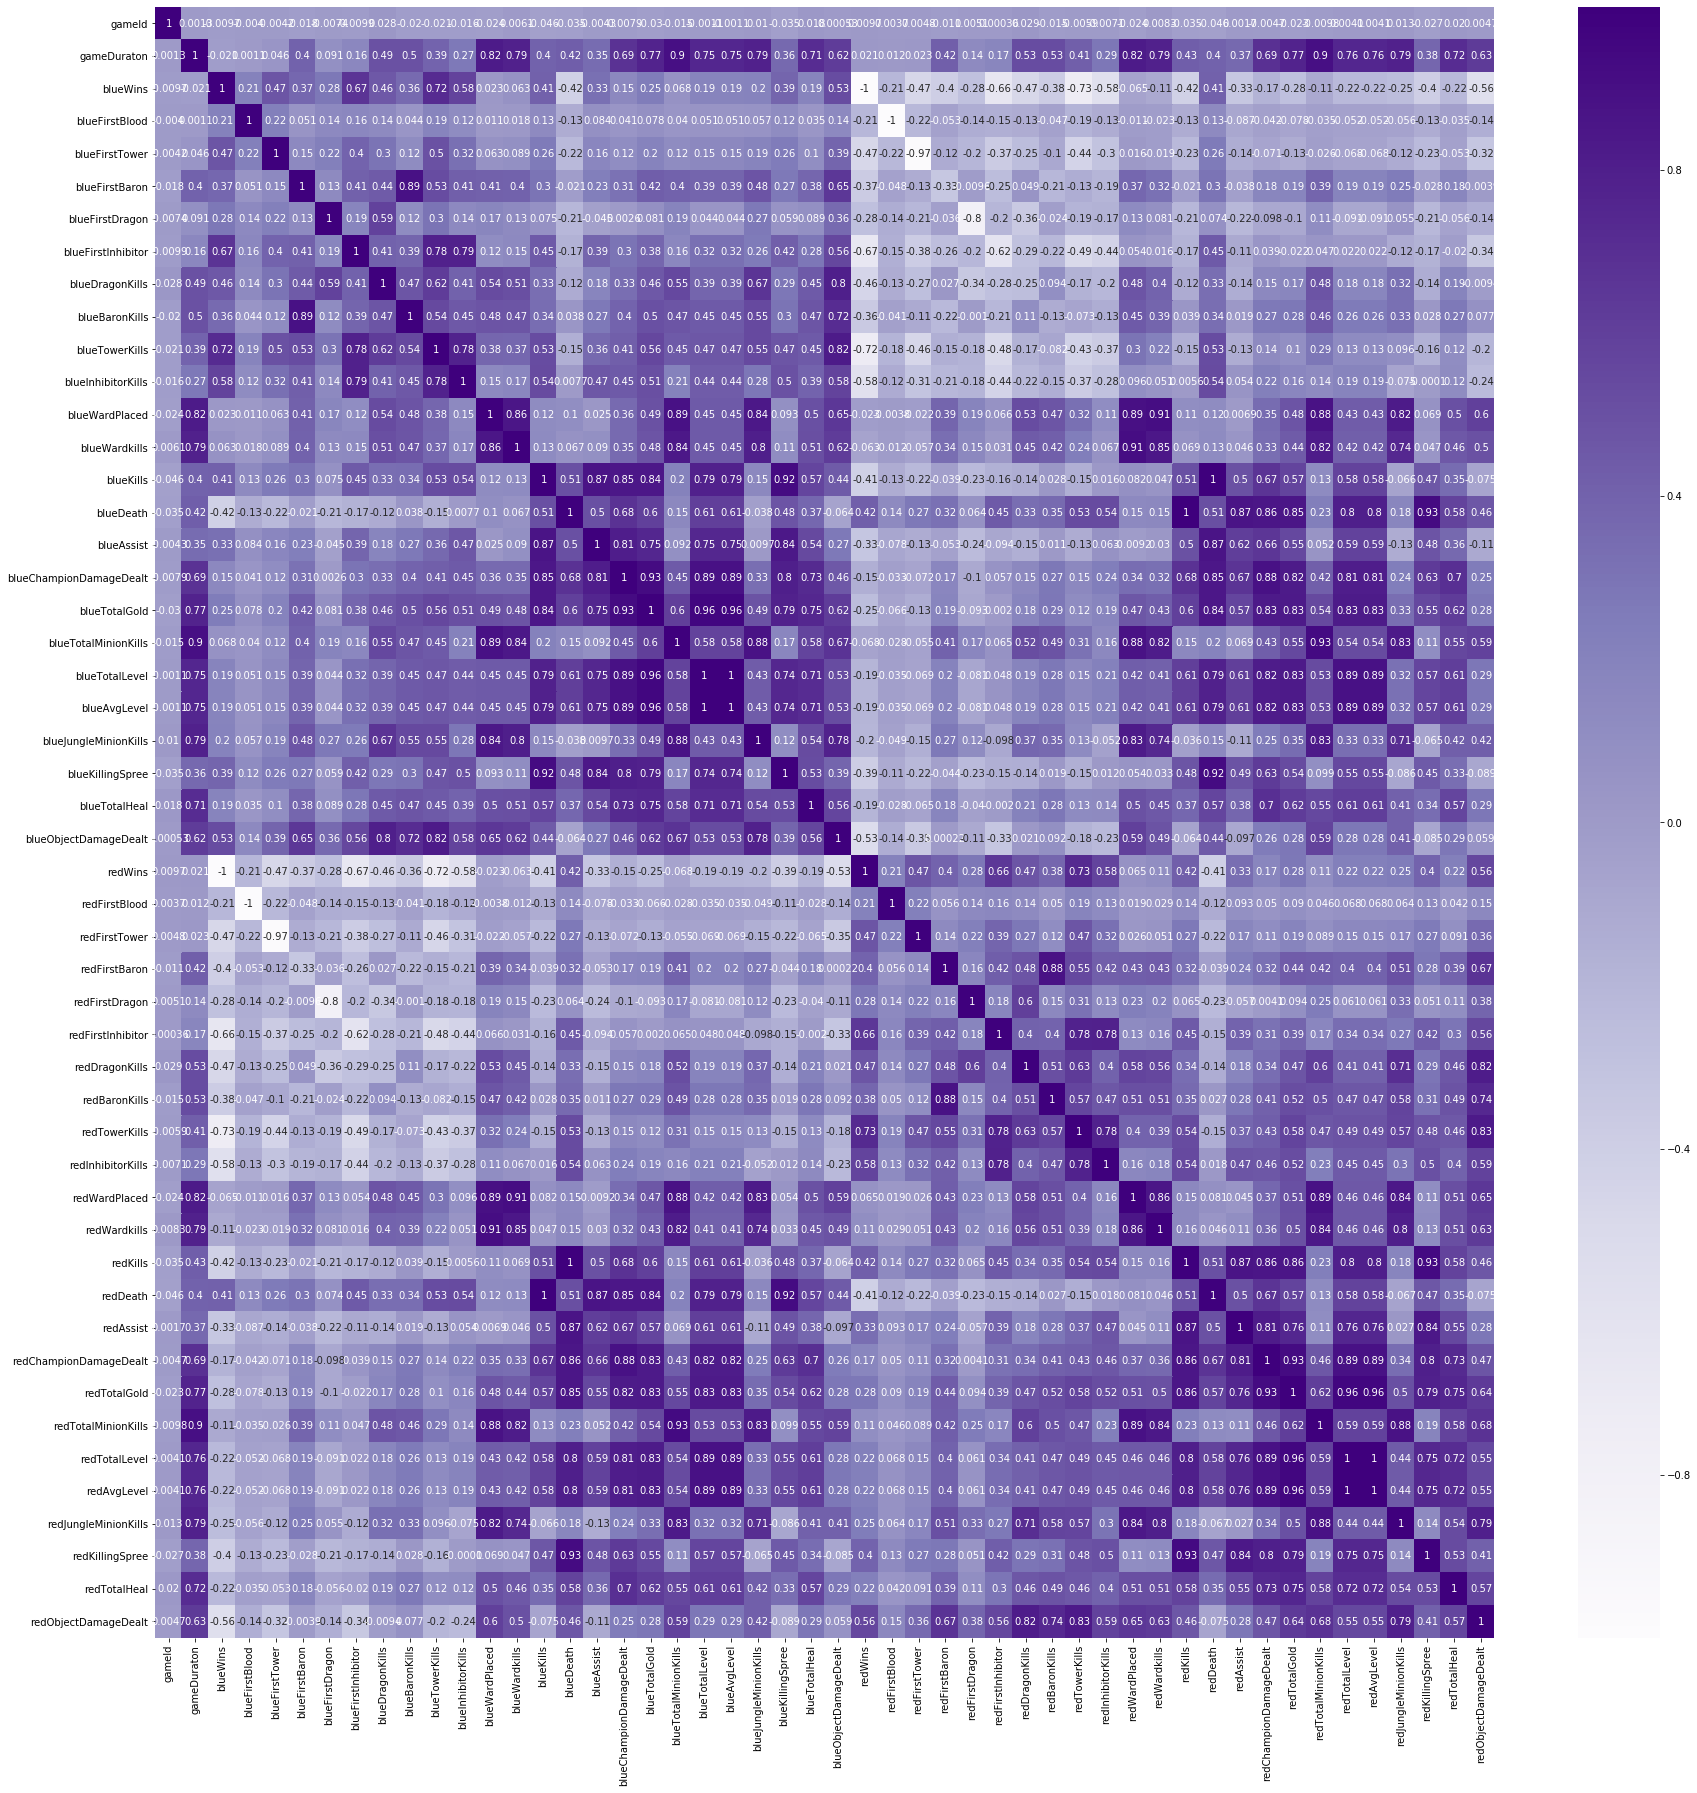

In [4]:
#Represented with heatmap:
plt.figure(figsize = (30,30))
sns.heatmap(data_set.corr(),annot = True,cmap = plt.cm.Purples)
plt.show()

# Necessary modifications on the main data
We delete columns that affects negatively our data + deleting unnecessary columns

### Removed because of being unrelated:
- gameId
- gameDuraton

### Removed because of information is derivable from other team:
- redFirstBlood
- redFirstTower
- redFirstDragon
- redFirstInhibitor

### Combined because of their difference makes much more sense:
Game winner is mostly related with making gaps and being advantegous team

- DragonKills
- BaronKills
- InhibitorKills
- WardPlaced
- WardKills
- Assist
- ChampionDamageDealt
- JungleMinionKills
- TotalHeal

### Needs to be deleted because they are really co-related with win condition(read below):

- TotalGold, TotalMinionKills, TotalTowerKills, TotalLevel
- AvgLevel
- Kills
- Death
- ObjectDamageDealt

According to investigation we did on original data, 

Winning and losing, both seek to secure objectives.
Differences in dragon,baron,tower, and inhibitors are greater than the differences in gold/creep score (CS)/wards placed/wards destroyed
Overall, the differences in macro management is greater than the differences in micro management

Dataset will benefit from a transformation to move closer to a normal distribution.
That's why we dropped some of these macros and kept more micros.

In [5]:
data_set = data_set.drop(['gameId','gameDuraton', 'redWins','redFirstBlood','redFirstTower','redFirstBaron','redFirstDragon','redFirstInhibitor'],axis = 1)
data_set['blueDragonKills']=data_set['blueDragonKills']-data_set['redDragonKills']
data_set['blueBaronKills']=data_set['blueBaronKills']-data_set['redBaronKills']
data_set['blueTowerKills']=data_set['blueTowerKills']-data_set['redTowerKills']
data_set['blueInhibitorKills']=data_set['blueInhibitorKills']-data_set['redInhibitorKills']
data_set['blueWardPlaced']=data_set['blueWardPlaced']-data_set['redWardPlaced']
data_set['blueWardkills']=data_set['blueWardkills']-data_set['redWardkills']
data_set['blueKills']=data_set['blueKills']-data_set['redKills']
data_set['blueDeath']=data_set['blueDeath']-data_set['redDeath']
data_set['blueAssist']=data_set['blueAssist']-data_set['redAssist']
data_set['blueChampionDamageDealt']=data_set['blueChampionDamageDealt']-data_set['redChampionDamageDealt']
data_set['blueTotalGold']=data_set['blueTotalGold']-data_set['redTotalGold']
data_set['blueTotalMinionKills']=data_set['blueTotalMinionKills']-data_set['redTotalMinionKills']
data_set['blueTotalLevel']=data_set['blueTotalLevel']-data_set['redTotalLevel']
data_set['blueJungleMinionKills']=data_set['blueJungleMinionKills']-data_set['redJungleMinionKills']
data_set['blueObjectDamageDealt']=data_set['blueObjectDamageDealt']-data_set['redObjectDamageDealt']
data_set['blueTotalHeal']=data_set['blueTotalHeal']-data_set['redTotalHeal']
data_set = data_set.drop(['redDragonKills','redBaronKills','redTowerKills','redInhibitorKills','redWardPlaced','redWardkills','redKills','redDeath','redAssist','redChampionDamageDealt','redTotalGold','redTotalMinionKills'],axis = 1)
data_set = data_set.drop(['redTotalLevel','redJungleMinionKills','redObjectDamageDealt','redTotalHeal','redKillingSpree','redAvgLevel'],axis=1)

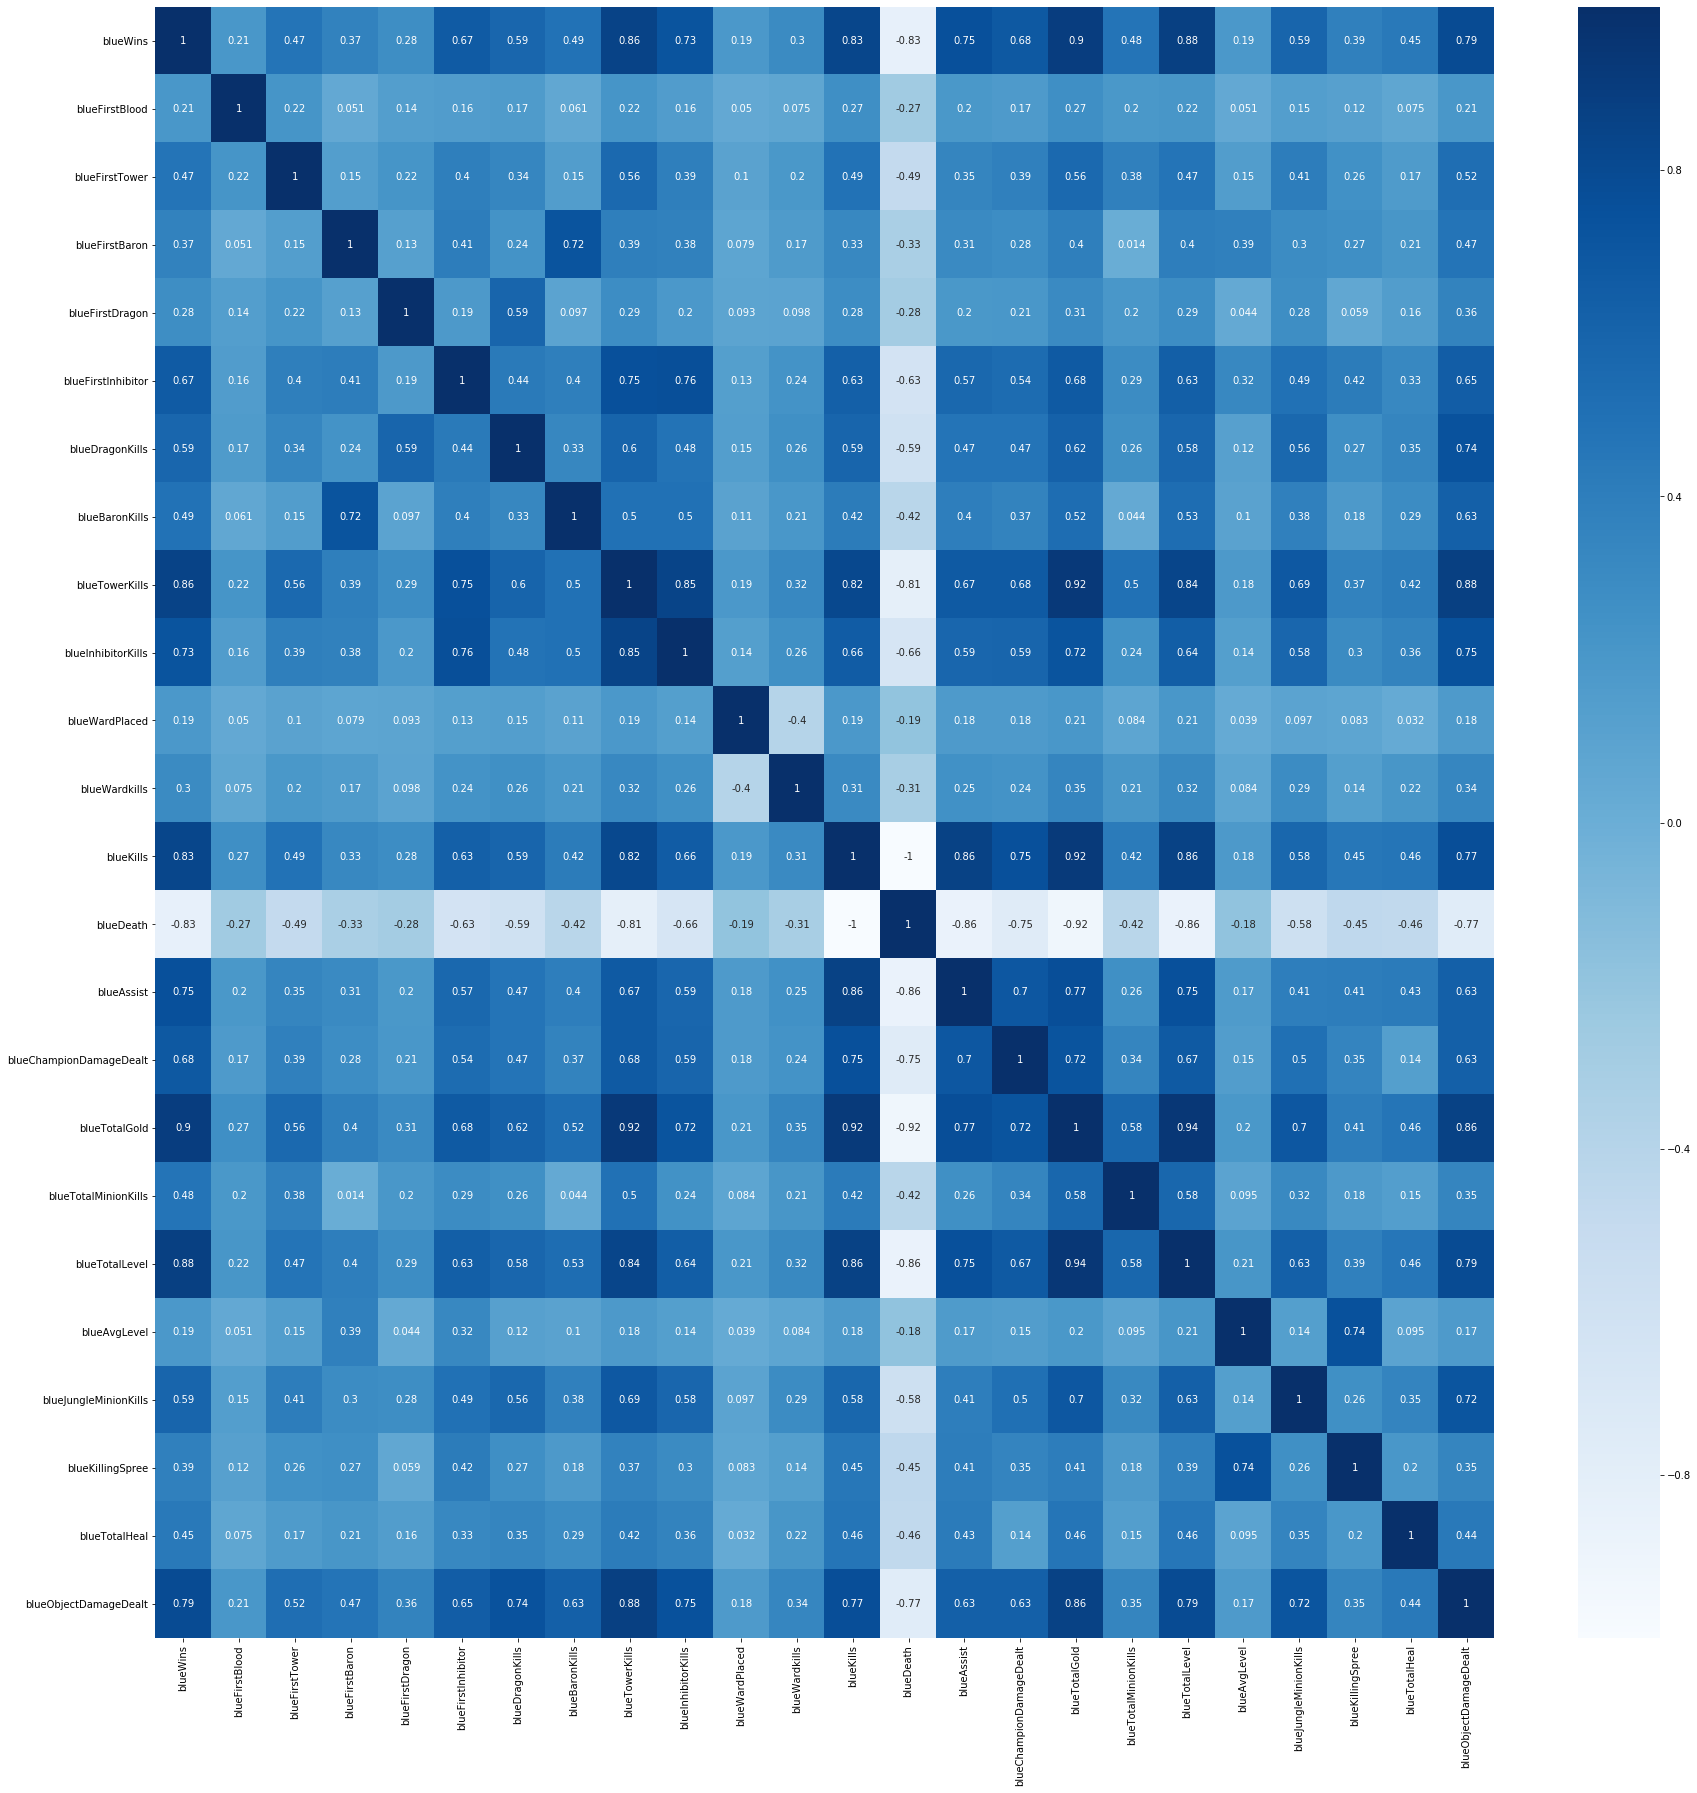

In [6]:
#Co-relation matrix revisited
plt.figure(figsize = (30,30))
sns.heatmap(data_set.corr(),annot = True,cmap = plt.cm.Blues)
plt.show()

In [7]:
#From this co-relation matrix we wanted to get rid of very informative columns
data_set = data_set.drop(['blueAvgLevel','blueTotalGold','blueTowerKills','blueTotalLevel','blueKills','blueKillingSpree','blueObjectDamageDealt','blueDeath'],axis=1)

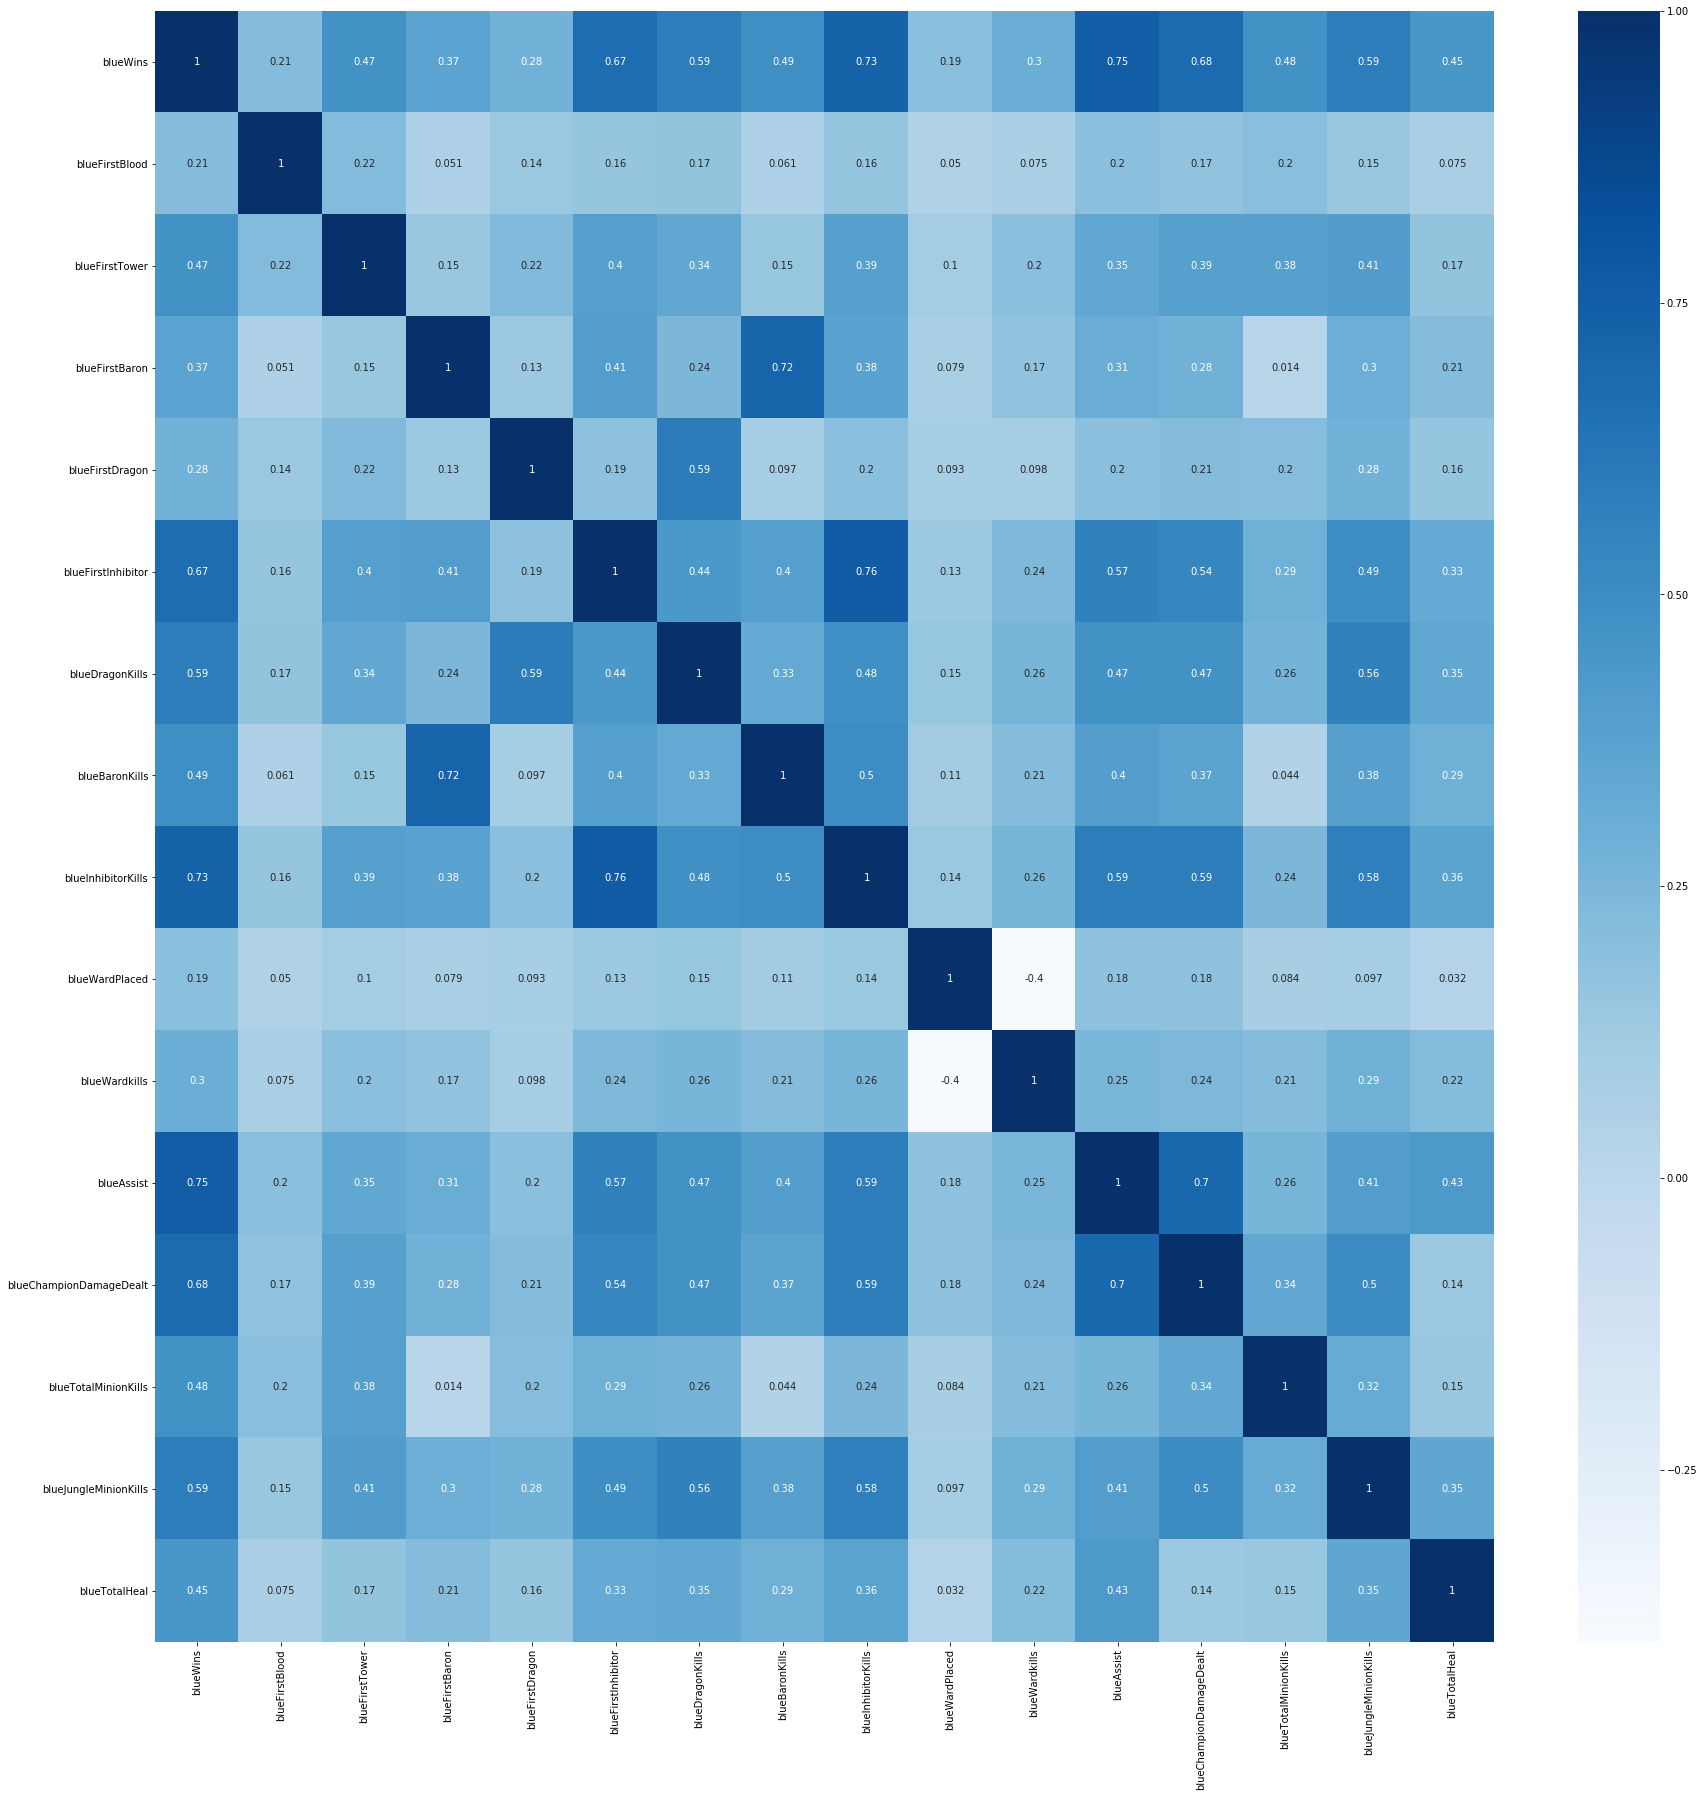

In [8]:
#Co-relation matrix re-revisited
plt.figure(figsize = (30,30))
sns.heatmap(data_set.corr(),annot = True,cmap = plt.cm.Blues)
plt.savefig('co2.png')
plt.show()

# Exploratory Data Analysis

In [9]:
data_set

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueAssist,blueChampionDamageDealt,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal
0,0,1,1,0,0,0,-3,0,0,-14,-4,-32,-10852,37,53,2659
1,0,0,1,0,0,0,-2,0,0,-19,-7,-34,-16837,53,-14,807
2,1,0,0,1,1,1,-1,1,2,-12,15,39,2963,21,56,20283
3,1,1,1,0,1,0,2,0,0,22,-2,29,20765,98,51,3594
4,0,1,1,0,1,0,1,0,0,5,-9,-17,7707,-37,-54,-23660
5,1,0,1,0,1,0,2,0,0,-11,6,18,7289,82,19,-3435
6,1,1,1,0,1,1,3,0,2,-14,10,19,23774,-61,63,11224
7,0,0,0,0,1,0,0,0,0,-6,5,-10,-7678,-16,27,-638
8,1,1,1,1,0,1,1,1,2,4,-2,11,18089,66,38,2485
9,1,1,1,0,0,1,1,0,1,0,7,24,15413,22,31,2623


In [10]:
#More inspections
win_stats = data_set.filter(like="blue").loc[data_set["blueWins"] == 1]
win_stats.describe()

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueAssist,blueChampionDamageDealt,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal
count,53041.0,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000,53041.000000
mean,1.0,0.612526,0.751739,0.394751,0.545220,0.716578,1.043212,0.374201,1.078204,2.552667,2.672555,19.380234,12720.796478,26.580419,27.868196,6078.569993
std,0.0,0.487178,0.432008,0.488802,0.497956,0.450664,1.647150,0.710125,0.994419,13.178410,7.357463,16.719986,13281.461741,59.671637,40.657670,12734.274391
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,-4.000000,-5.000000,-212.000000,-55.000000,-152.000000,-110371.000000,-319.000000,-266.000000,-167108.000000
25%,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-1.000000,10.000000,5486.000000,-11.000000,0.000000,-151.000000
50%,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,19.000000,12109.000000,24.000000,25.000000,5140.000000
75%,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,10.000000,6.000000,28.000000,19691.000000,64.000000,52.000000,12018.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,8.000000,143.000000,56.000000,199.000000,156002.000000,339.000000,262.000000,205582.000000


In [11]:
lose_stats = data_set.filter(like="blue").loc[data_set["blueWins"] == 0]
lose_stats.describe()

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueAssist,blueChampionDamageDealt,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal
count,54084.0,54084.000000,54084.000000,54084.000000,54084.000000,54084.000000,54084.000000,54084.000000,54084.000000,54084.000000,54084.000000,54084.000000,54084.000000,54084.000000,54084.000000,54084.000000
mean,0.0,0.403557,0.279676,0.080763,0.273519,0.065195,-1.333185,-0.433123,-1.039235,-2.666278,-2.034021,-18.765605,-11925.002700,-36.661379,-31.534557,-6671.468272
std,0.0,0.490615,0.448844,0.272474,0.445769,0.246872,1.644955,0.721494,1.014573,13.393245,7.429374,16.454280,13196.592853,57.237605,41.293090,12901.271786
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,-5.000000,-9.000000,-124.000000,-52.000000,-137.000000,-128929.000000,-312.000000,-273.000000,-110375.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-1.000000,-2.000000,-10.000000,-6.000000,-28.000000,-18985.250000,-73.000000,-56.000000,-12740.000000
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-2.000000,-1.000000,-18.000000,-11542.000000,-34.000000,-29.000000,-5736.000000
75%,0.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-9.000000,-4912.500000,0.000000,-1.000000,-177.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,3.000000,5.000000,197.000000,53.000000,120.000000,119210.000000,323.000000,221.000000,105374.000000


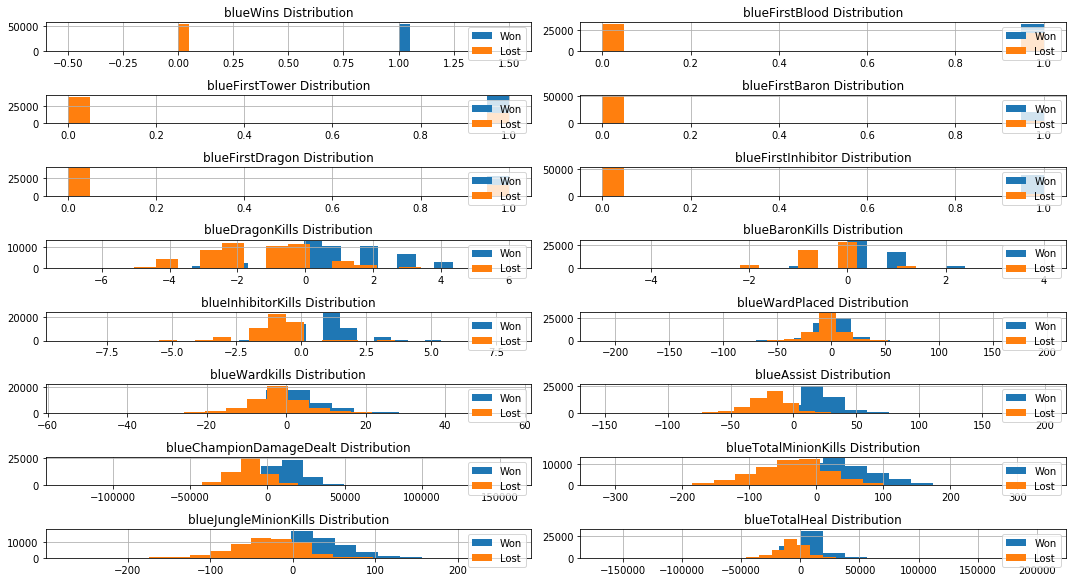

In [12]:
from matplotlib import pyplot
def compare_histograms(df1, df2, variables, n_rows, n_cols):
        fig=plt.figure(figsize=(15,15))
        for i, var_name in enumerate(variables):
            ax=fig.add_subplot(n_rows,n_cols,i+1)
            df1[var_name].hist(bins=20, ax=ax, label="Won") # for histogram
            df2[var_name].hist(bins=20, ax=ax, label="Lost") # for histogram
            ax.set_title(var_name+" Distribution")
            pyplot.legend(loc="upper right")
            plt.tight_layout()
        plt.show()



histogram_data_win = win_stats
histogram_data_lose = lose_stats
        
compare_histograms(histogram_data_win, histogram_data_lose, histogram_data_win, 15, 2)

# Data Preprocessing

In [13]:
y = data_set.iloc[:,0].values #win class
x = data_set.iloc[:,1:].values #other attributes seperated

In [14]:
#Preparing train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3,stratify=y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
'''#Double Cross Validation in order to find optimal n_estimators and max_features that results with useful accuracy. 

from sklearn.model_selection import KFold
from sklearn import tree
import matplotlib.pyplot as plt

# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(x):
	# split data
	X_train, X_test = x[train_ix, :], x[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
	model = RandomForestClassifier(random_state=1)
	# define search space
	space = dict()
	space['n_estimators'] = [10, 200, 1000]
	space['max_features'] = [4, 6, 10]
	# define search
	search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# evaluate the model
	acc = accuracy_score(y_test, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))'''

"#Double Cross Validation in order to find optimal n_estimators and max_features that results with useful accuracy. \n\nfrom sklearn.model_selection import KFold\nfrom sklearn import tree\nimport matplotlib.pyplot as plt\n\n# manual nested cross-validation for random forest on a classification dataset\nfrom numpy import mean\nfrom numpy import std\nfrom sklearn.datasets import make_classification\nfrom sklearn.model_selection import KFold\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score\n\n# configure the cross-validation procedure\ncv_outer = KFold(n_splits=10, shuffle=True, random_state=1)\n# enumerate splits\nouter_results = list()\nfor train_ix, test_ix in cv_outer.split(x):\n\t# split data\n\tX_train, X_test = x[train_ix, :], x[test_ix, :]\n\ty_train, y_test = y[train_ix], y[test_ix]\n\t# configure the cross-validation procedure\n\tcv_inner = KFold(n_splits=3, shuffle=True, random_sta

# Modal Selection - XGboost Classifier

In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

classifier = XGBClassifier(n_estimators = 100,learning_rate = 0.3)
classifier.fit(x_train,y_train, eval_set=[(x_train,y_train),(x_test,y_test)])
y_pred = classifier.predict(x_test)

[0]	validation_0-error:0.02633	validation_1-error:0.02875
[1]	validation_0-error:0.02430	validation_1-error:0.02676
[2]	validation_0-error:0.02419	validation_1-error:0.02735
[3]	validation_0-error:0.02268	validation_1-error:0.02558
[4]	validation_0-error:0.02210	validation_1-error:0.02499
[5]	validation_0-error:0.02134	validation_1-error:0.02443
[6]	validation_0-error:0.02091	validation_1-error:0.02396
[7]	validation_0-error:0.01975	validation_1-error:0.02359
[8]	validation_0-error:0.01942	validation_1-error:0.02318
[9]	validation_0-error:0.01860	validation_1-error:0.02256
[10]	validation_0-error:0.01788	validation_1-error:0.02200
[11]	validation_0-error:0.01743	validation_1-error:0.02162
[12]	validation_0-error:0.01687	validation_1-error:0.02119
[13]	validation_0-error:0.01646	validation_1-error:0.02069
[14]	validation_0-error:0.01596	validation_1-error:0.02060
[15]	validation_0-error:0.01559	validation_1-error:0.02019
[16]	validation_0-error:0.01540	validation_1-error:0.01998
[17]	va

# Metrics #1-1

In [17]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm,"\n accuracy:",accuracy)

[[15932   293]
 [  330 15583]] 
 accuracy: 0.9806148484659905


# Modal Selection - Decision Tree Classifier

In [18]:
from sklearn import tree
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(criterion = "gini", min_samples_split=5000, max_features=4)
clf = clf.fit(x_train,y_train)
y_pred2 = clf.predict(x_test)

# Metrics #1-2

In [19]:
cm2 = confusion_matrix(y_test, y_pred2)
accuracy2 = accuracy_score(y_test, y_pred2)
print(cm2,"\n accuracy:",accuracy2)

[[14930  1295]
 [ 1303 14610]] 
 accuracy: 0.919161117680005


# Visualization of XGB Tree and Decision Tree 1

In [20]:
#XGB Tree as .png saved
import xgboost as xgb

format = 'png' #You should try the 'svg'

image = xgb.to_graphviz(classifier)

#Set a different dpi (work only if format == 'png')
image.graph_attr = {'dpi':'400'}

image.render('updated-Master-XGB-1', format = format)

'updated-Master-XGB-1.png'

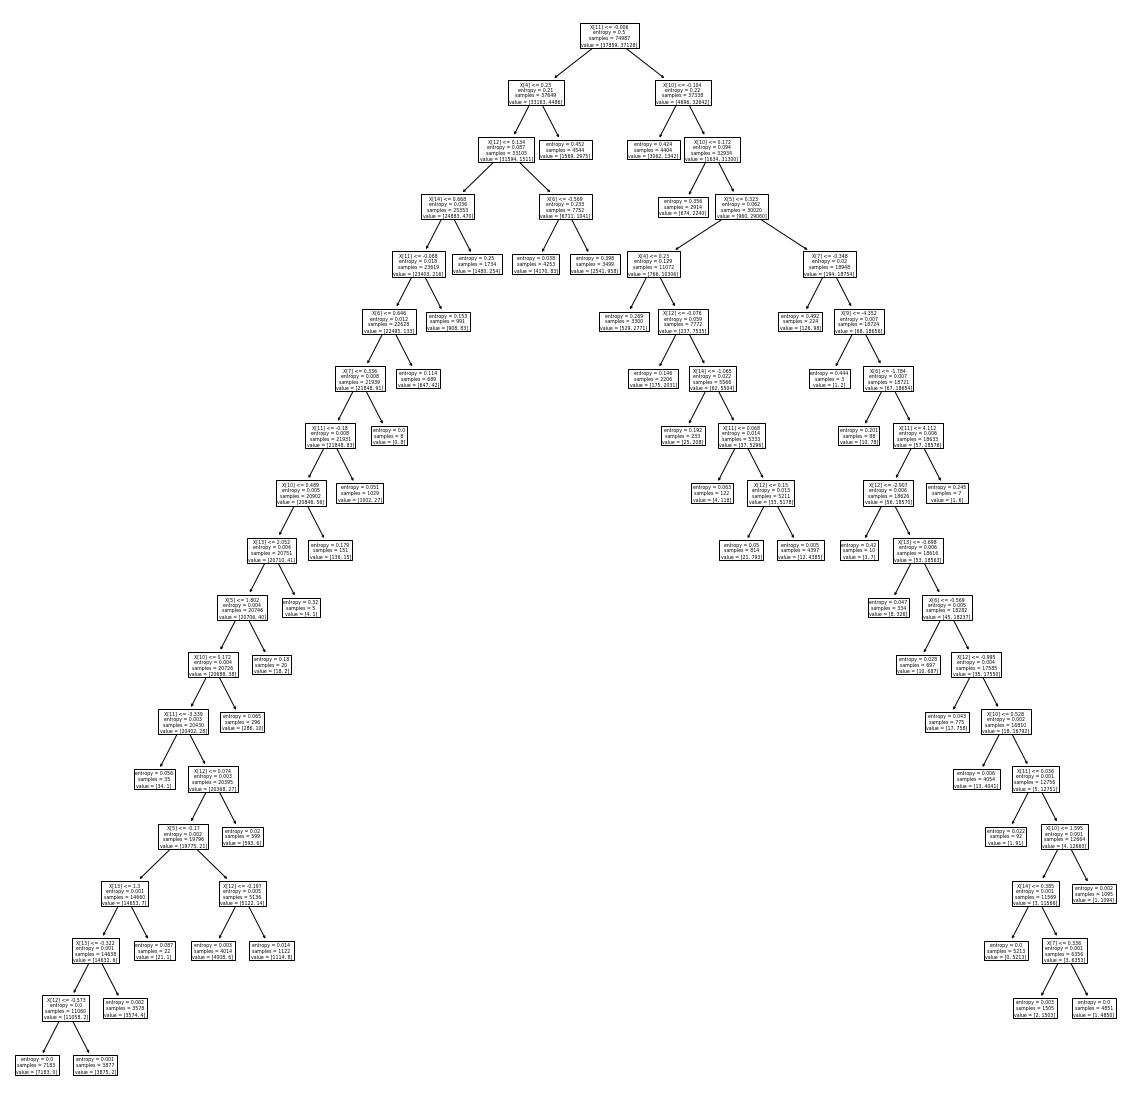

C:\Users\alper\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


'updated-Master-Decision-1.png'

In [21]:
#Decision Tree as you can see down below and saved as .png
tree_plot = plt.figure(figsize=(20,20))
tree.plot_tree(clf)
plt.show()

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import pandas as pd
import graphviz

dot_data = export_graphviz(clf, out_file=None,filled=True, rounded=True, special_characters=True ,class_names=['0','1'])
graph = graphviz.Source(dot_data)

graph.render(filename="updated-Master-Decision-1", format="png")

# Dimensionality Reduction by PCA

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
reduction = pca.fit_transform(x_train)
reduction_test = pca.transform(x_test)
print(pca.explained_variance_ratio_)

[0.35278813]


In [23]:
data_reduced = pd.DataFrame(data = reduction,columns = ['pc1'])
data_reduced

,pc1
0,-1.912766
1,-3.134028
2,-3.141318
3,-2.006818
4,-2.628573
5,-0.525799
6,0.591827
7,-3.789950
8,-1.888459
9,-2.003452


In [24]:
reduction_test

array([[ 2.33564863],
       [ 2.45896029],
       [-3.98284225],
       ...,
       [-2.22997717],
       [ 0.96640515],
       [ 0.12148217]])

In [25]:
#Preparing PC1 to put in XGB again
x_reduced = data_reduced.iloc[:,:].values

# PCA XGB Tree

In [26]:
#Fitting XGB Classifier
from xgboost import XGBClassifier
reduced_class = XGBClassifier(n_estimators = 100,learning_rate = 0.1)
reduced_class.fit(x_reduced,y_train)
y_reduced_pred = reduced_class.predict(reduction_test)

# Metrics #2-1

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test, y_reduced_pred)
accuracy = accuracy_score(y_test, y_reduced_pred)
print(cm,"\n accuracy:",accuracy)

[[15315   910]
 [  799 15114]] 
 accuracy: 0.9468230754869624


# PCA Decision Tree

In [28]:
#Fitting Decision Tree Classifier
clf2 = tree.DecisionTreeClassifier(criterion = "gini", min_samples_split=5000)
clf2 = clf2.fit(x_reduced,y_train)
y_reduced_pred2 = clf2.predict(reduction_test)

# Metrics #2-2

In [29]:
cm2 = confusion_matrix(y_test, y_reduced_pred2)
accuracy2 = accuracy_score(y_test, y_reduced_pred2)
print(cm2,"\n accuracy:",accuracy2)

[[15330   895]
 [  812 15101]] 
 accuracy: 0.9468853071130748


# Visualization of XGB Tree and Decision Tree 2

In [30]:
#XGB Tree as .png saved
import xgboost as xgb

format = 'png' #You should try the 'svg'

image = xgb.to_graphviz(reduced_class)

#Set a different dpi (work only if format == 'png')
image.graph_attr = {'dpi':'400'}

image.render('updated-Master-XGB-2', format = format)

'updated-Master-XGB-2.png'

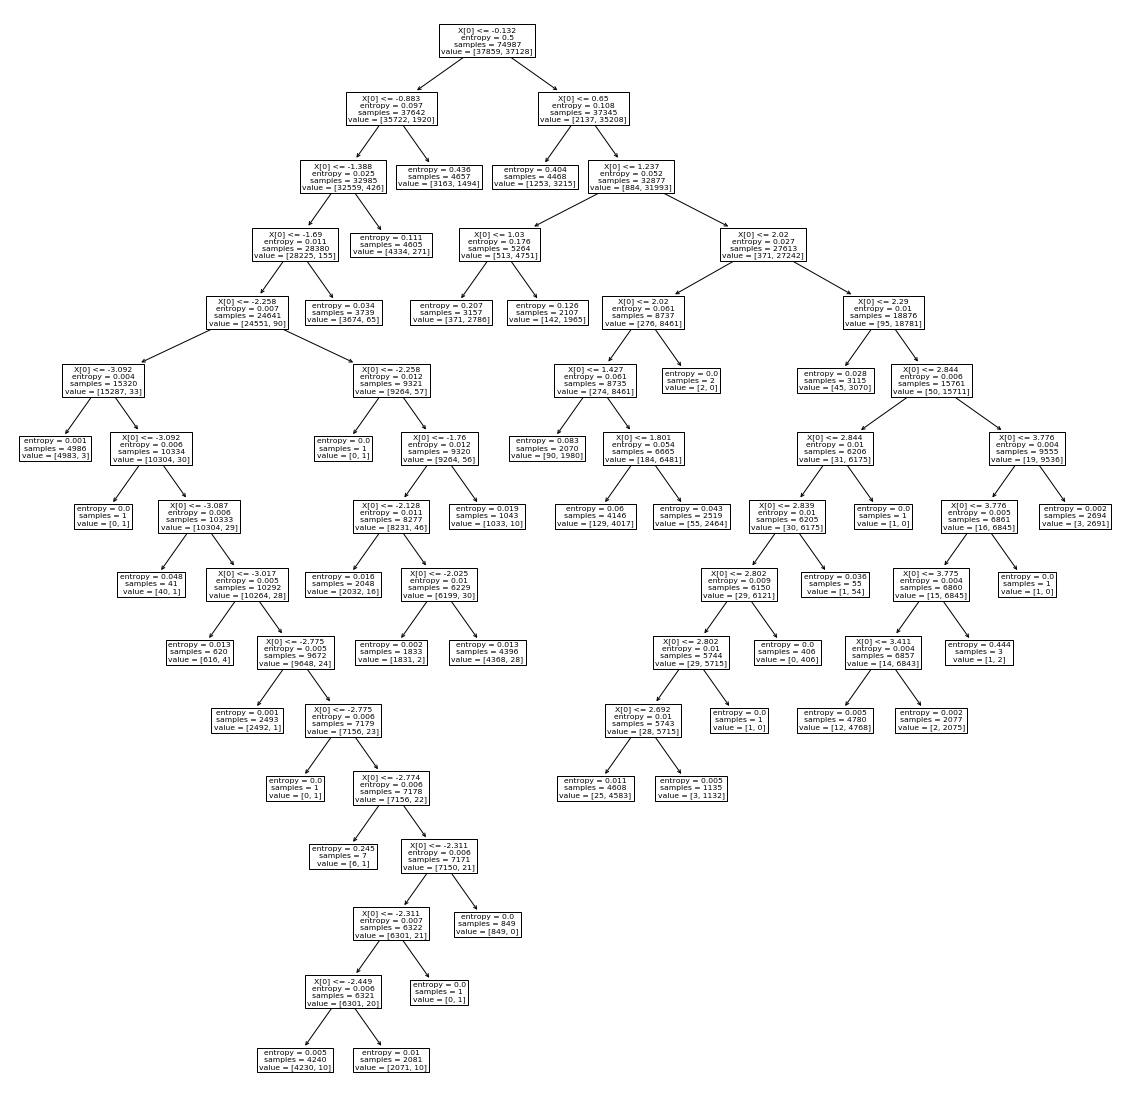

'updated-Master-Decision-2.png'

In [31]:
#Decision Tree as you can see down below and saved as .png
tree_plot = plt.figure(figsize=(20,20))
tree.plot_tree(clf2)
plt.show()

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import pandas as pd
import graphviz

dot_data = export_graphviz(clf2, out_file=None,filled=True, rounded=True, special_characters=True ,class_names=['0','1'])
graph = graphviz.Source(dot_data)

graph.render(filename="updated-Master-Decision-2", format="png")